# Part 1 : Exploratory Data

In [1]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import plotly.plotly as py
from plotly.graph_objs import *
from matplotlib.pyplot import GridSpec
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import make_blobs
import missingno as msno
import pivottablejs
import pandas_profiling
import logging

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\pandas_profiling\plot.py:15: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sreer\Anaconda3\envs\learn_python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sreer\Anaconda3\envs\learn_python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\sreer\Anaconda3\envs\learn_pytho

In [2]:
data= pd.read_csv("trainingData.csv")

In [3]:
data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [6]:
data.shape 

(19937, 529)

In [7]:
data.iloc[:,-10:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 10 columns):
WAP520              19937 non-null int64
LONGITUDE           19937 non-null float64
LATITUDE            19937 non-null float64
FLOOR               19937 non-null int64
BUILDINGID          19937 non-null int64
SPACEID             19937 non-null int64
RELATIVEPOSITION    19937 non-null int64
USERID              19937 non-null int64
PHONEID             19937 non-null int64
TIMESTAMP           19937 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.5 MB


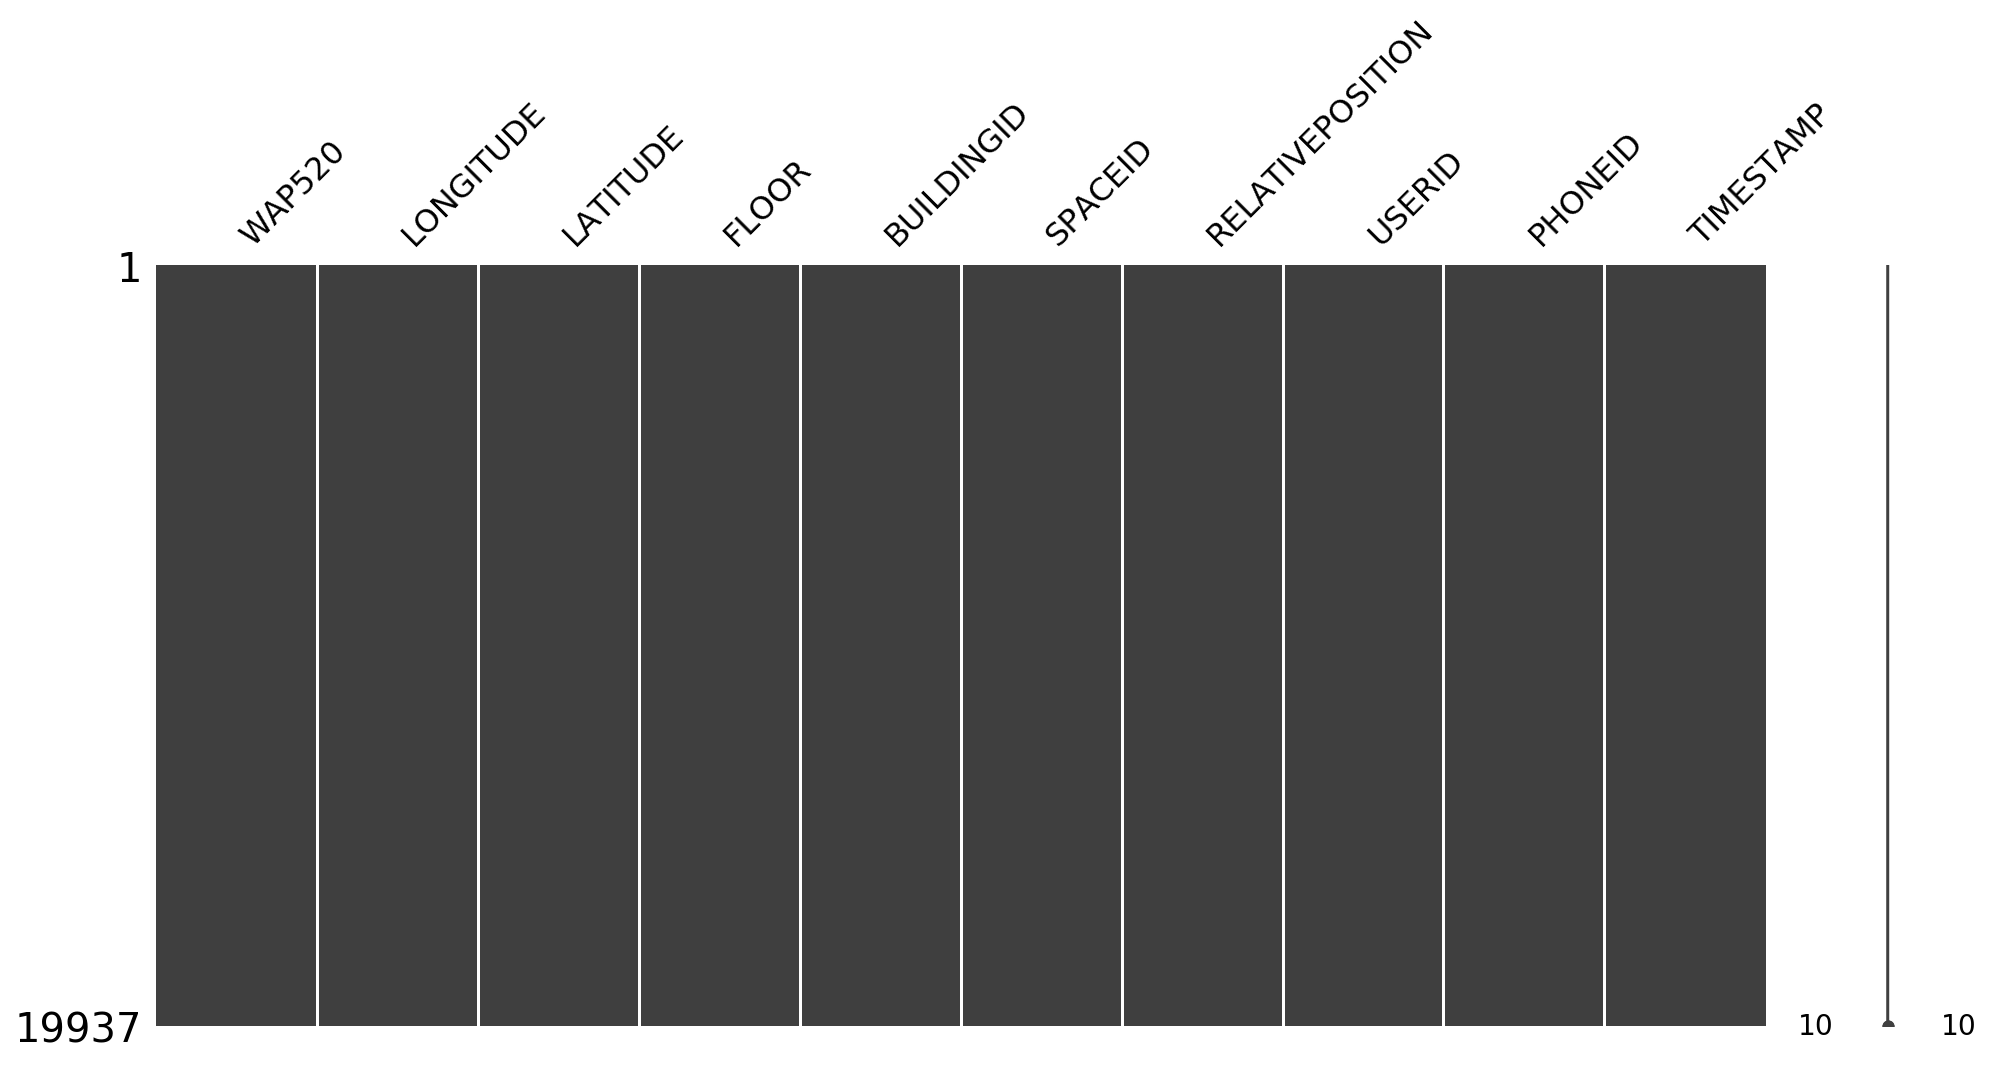

In [8]:
msno.matrix(data.iloc[:,-10:], figsize = (16, 7), )

In [9]:
data.isnull().sum()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
WAP006              0
WAP007              0
WAP008              0
WAP009              0
WAP010              0
WAP011              0
WAP012              0
WAP013              0
WAP014              0
WAP015              0
WAP016              0
WAP017              0
WAP018              0
WAP019              0
WAP020              0
WAP021              0
WAP022              0
WAP023              0
WAP024              0
WAP025              0
WAP026              0
WAP027              0
WAP028              0
WAP029              0
WAP030              0
                   ..
WAP500              0
WAP501              0
WAP502              0
WAP503              0
WAP504              0
WAP505              0
WAP506              0
WAP507              0
WAP508              0
WAP509              0
WAP510              0
WAP511              0
WAP512              0
WAP513              0
WAP514    

In [10]:
data.iloc[:3,-1:]

,TIMESTAMP
0,1371713733
1,1371713691
2,1371714095


In [11]:
pd.to_datetime(1371713733,unit='s')

Timestamp('2013-06-20 07:35:33')

In [ ]:
data["TIMESTAMP"] = data['TIMESTAMP'].apply(lambda x: pd.to_datetime(x,unit='s'))

In [ ]:
print("First Recorded Time :")
print(data.iloc[:1,-1:])
print("Last Recorded TIme : ")
print(data.iloc[-1:,-1:])

In [ ]:
pandas_profiling.ProfileReport(data.iloc[:,-10:])

In [ ]:
data.corr()

In [ ]:
plt.matshow(data.corr())

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
get_top_abs_correlations(data,n=20)

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [13]:


X = data.drop(columns=['SPACEID'])
y = data['SPACEID']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [15]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([9.86917854e-05, 9.68568180e-05, 0.00000000e+00, 0.00000000e+00,
       1.28465859e-04, 1.56835729e-03, 1.94290497e-03, 2.73522920e-03,
       1.78397500e-03, 3.09092758e-04, 5.42507673e-03, 5.96794627e-03,
       3.75562378e-03, 4.24924978e-03, 1.89776968e-03, 2.31112966e-03,
       5.46202195e-04, 4.73424667e-04, 1.23504478e-03, 1.36280686e-03,
       2.15102512e-04, 2.22455375e-04, 1.79986536e-03, 1.90865788e-03,
       1.69931497e-03, 2.32596684e-03, 2.19262643e-03, 2.57932867e-03,
       3.06524744e-03, 4.06010238e-03, 1.58138476e-03, 1.45691375e-03,
       2.95603206e-03, 3.32061008e-03, 4.13215769e-03, 4.61093979e-03,
       2.19631082e-03, 1.44084472e-03, 3.78787952e-03, 3.09958156e-03,
       3.83620603e-03, 3.18047748e-03, 2.79434374e-03, 2.86096501e-03,
       1.96746386e-03, 2.38608689e-03, 3.03285885e-03, 3.01062363e-03,
       1.63835546e-03, 1.49961711e-03, 4.44634496e-03, 4.47861306e-03,
       2.15458493e-03, 2.15367278e-03, 8.01373740e-05, 1.40010063e-04,
      

In [ ]:
def rankPrintImportance(importance,df):
    rank = sorted(zip(map(lambda x: x, importance), list(df)), 
                 reverse=True)
    for ran in rank:
        print(ran)

Text(0,0.5,'Importance Score')

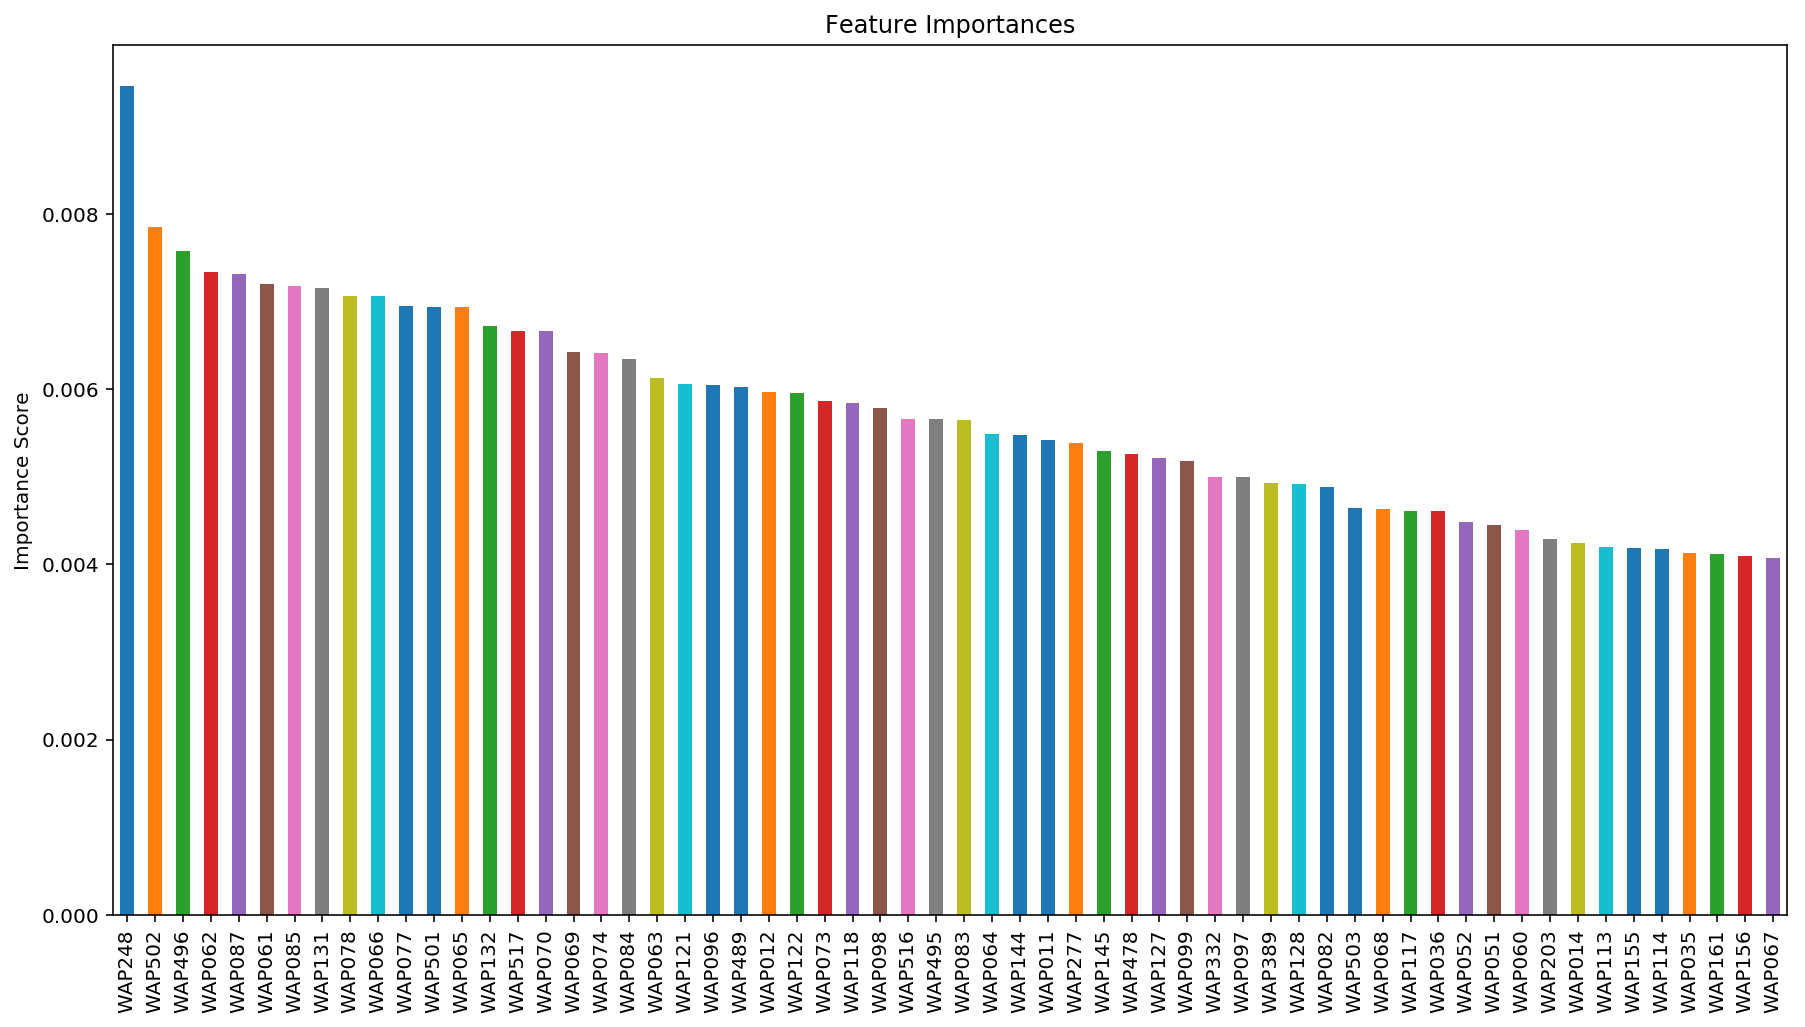

In [31]:
feat_imp = pd.Series(clf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp = feat_imp[7:]
feat_imp = feat_imp[:60]
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

In [34]:
feat_imp = pd.Series(clf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp[:10]

LATITUDE            0.067338
LONGITUDE           0.066717
TIMESTAMP           0.037661
FLOOR               0.014700
PHONEID             0.012444
USERID              0.012356
RELATIVEPOSITION    0.010237
WAP248              0.009456
WAP502              0.007853
WAP496              0.007576
dtype: float64

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Text(0,0.5,'Importance Score')

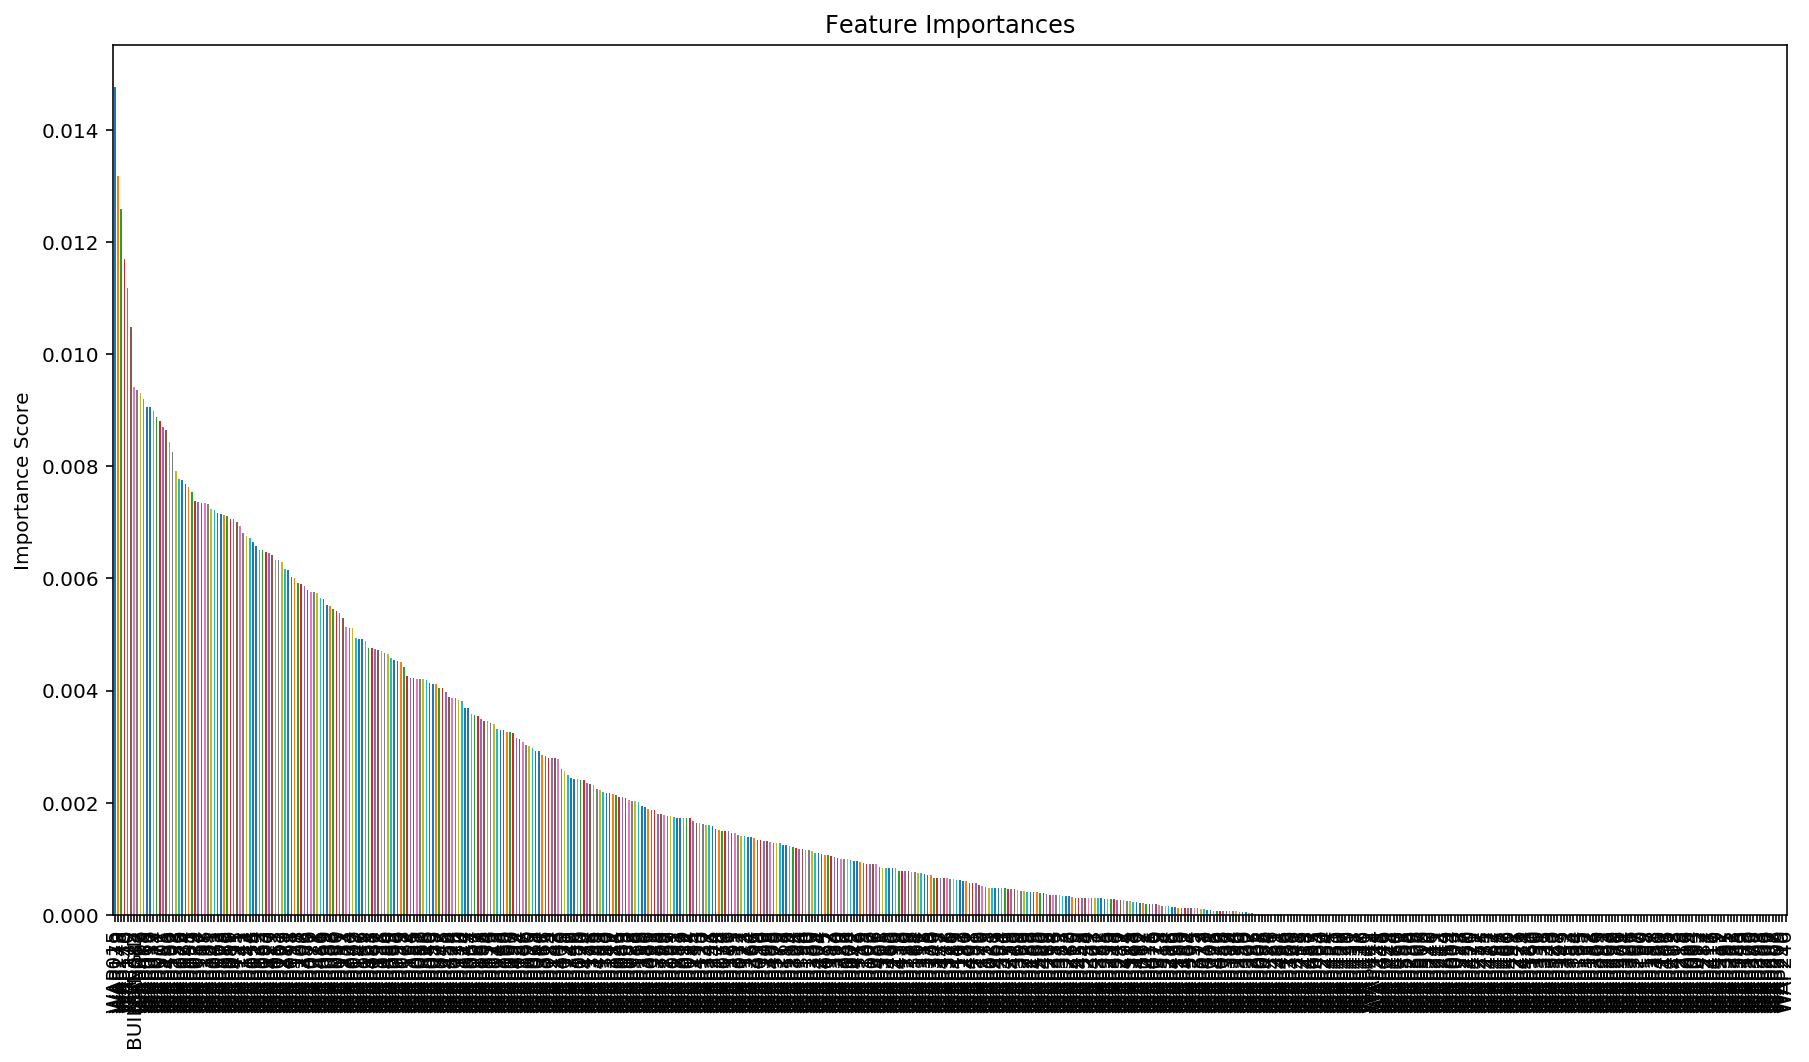

In [35]:
data2 = data
X = data2.drop(columns=['SPACEID','LATITUDE','LONGITUDE','TIMESTAMP','FLOOR','PHONEID','USERID',''])
y = data2['SPACEID']

# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# y = min_max_scaler.fit_transform(y.reshape(1, -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Text(0,0.5,'Importance Score')

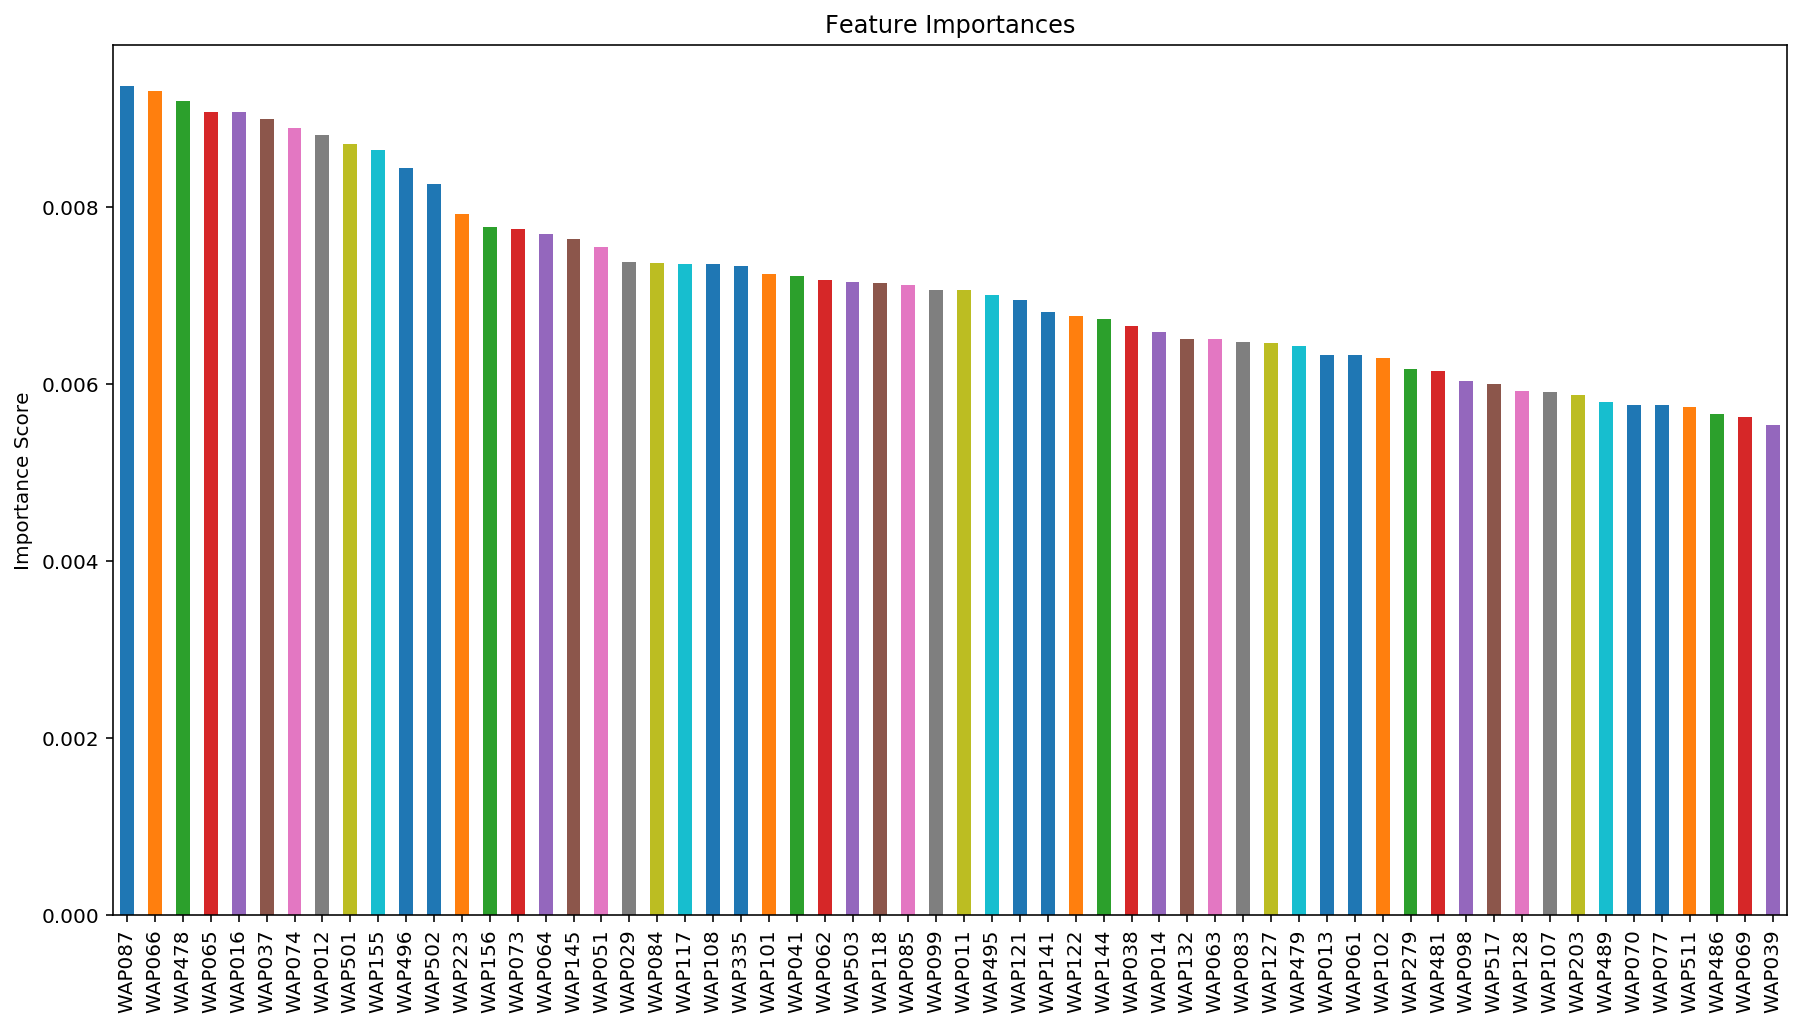

In [36]:
feat_imp = pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp = feat_imp[7:]
feat_imp = feat_imp[:60]
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

In [37]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [38]:
 
# load X and y
X = data.drop(columns=['SPACEID','LATITUDE','LONGITUDE','TIMESTAMP','FLOOR','PHONEID','USERID','RELATIVEPOSITION']).values
y = data['SPACEID'].values
print(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestClassifier(n_jobs=-1)
 
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)
 
# check selected features
feat_selector.support_
 
# check ranking of features
feat_selector.ranking_

[[100 100 100 ... 100 100   1]
 [100 100 100 ... 100 100   1]
 [100 100 100 ... 100 100   1]
 ...
 [100 100 100 ... 100 100   1]
 [100 100 100 ... 100 100   1]
 [100 100 100 ... 100 100   1]] [106 106 103 ...  13 113 112]
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	521
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	486


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	17 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	18 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	19 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	487


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	20 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	21 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	22 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	23 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	24 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	25 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	26 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	27 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	28 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	29 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	30 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	31 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	488


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	32 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	490


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	33 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	490
Iteration: 	34 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	521


BorutaPy finished running.

Iteration: 	35 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	521


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



array([370, 368, 495, 495, 342, 229, 208, 104, 147, 330,  31,  24,  62,
        65,  98,  93, 310, 314, 191, 209, 337, 348, 182, 186, 139, 134,
       173, 169,  72,  67, 204, 211,  88,  83,  59,  58, 138, 147,  86,
        84,  73,  70, 106, 102, 187, 161,  96,  94, 197, 184,  49,  52,
       125, 118, 355, 351, 216, 212,  60,  54,  21,   9,  37,  32,  10,
         7,  55,  56,  18,  11, 276, 273,  30,  28, 128, 125,  18,  12,
       452, 118, 117,  38,  40,  22,  22, 325,   5, 188, 171, 113, 121,
       495, 495, 495, 495,  43,  40,  35,  34, 345, 134, 134, 136, 121,
       130, 132,  80,  75, 258, 253, 251, 256,  66,  62, 100,  89,  33,
        26, 116, 110,  16,  16, 154, 149, 163, 153,  39,  42, 194, 192,
        12,  20, 387, 131, 143, 200, 178,  68,  69,  94, 106,  92,  76,
        36,  14, 140, 152, 185, 180, 150, 111, 495, 439, 115,  53,  51,
       384, 495, 495, 495,  57,  62, 364, 227, 227, 105, 103, 144, 142,
       147, 156,  81,  79, 196, 201, 112, 120, 127, 123, 159, 15

Text(0,0.5,'Rank')

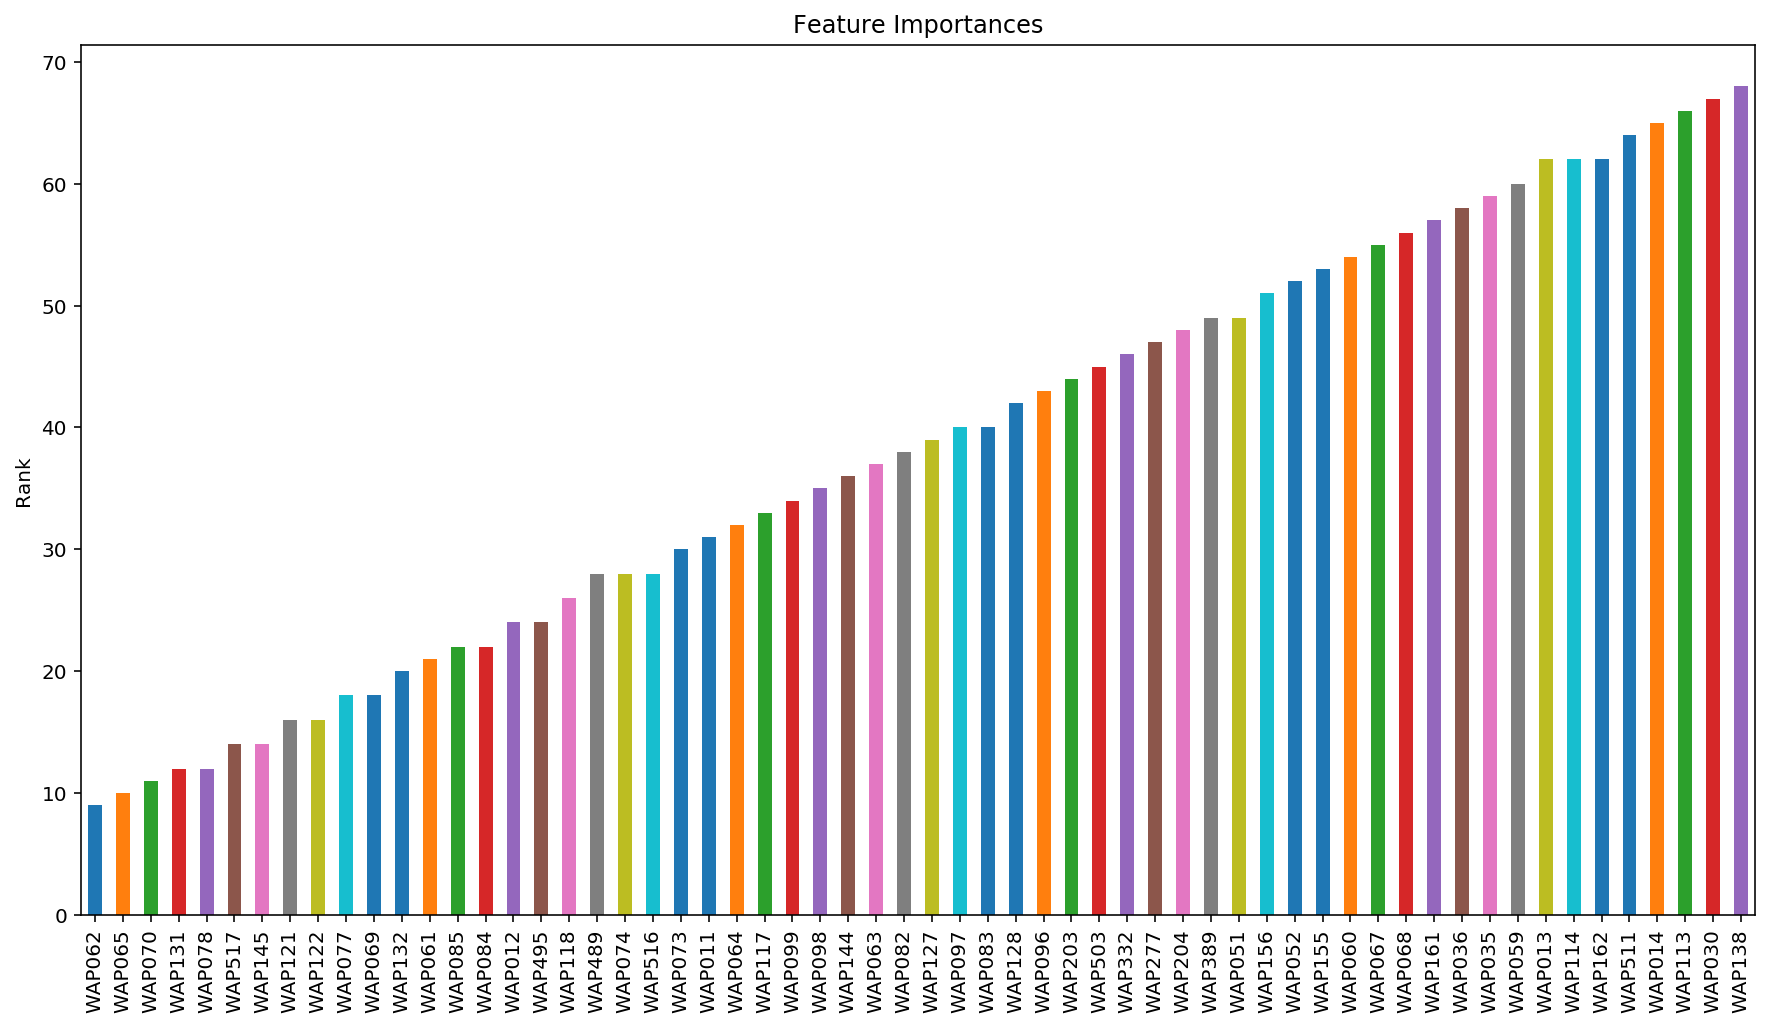

In [40]:
feat_imp = pd.Series(feat_selector.ranking_,X_train.columns).sort_values(ascending=True)
feat_imp = feat_imp[7:]
feat_imp = feat_imp[:60]
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Rank')